Original CPI Estimate: 345
Mean of Bootstrap Estimates: 335.1103653522795
Bias (Mean Difference): -9.889634647720527
Bootstrap Standard Error: 4.889438159415919
Confidence Interval for Bias Estimate: (334.80695280433264, 335.4137779002263)
Is the bias statistically significant? Yes
Selected Model: Linear Regression
R-squared: 0.022072619834715534
RMSE: 33.40703565117975


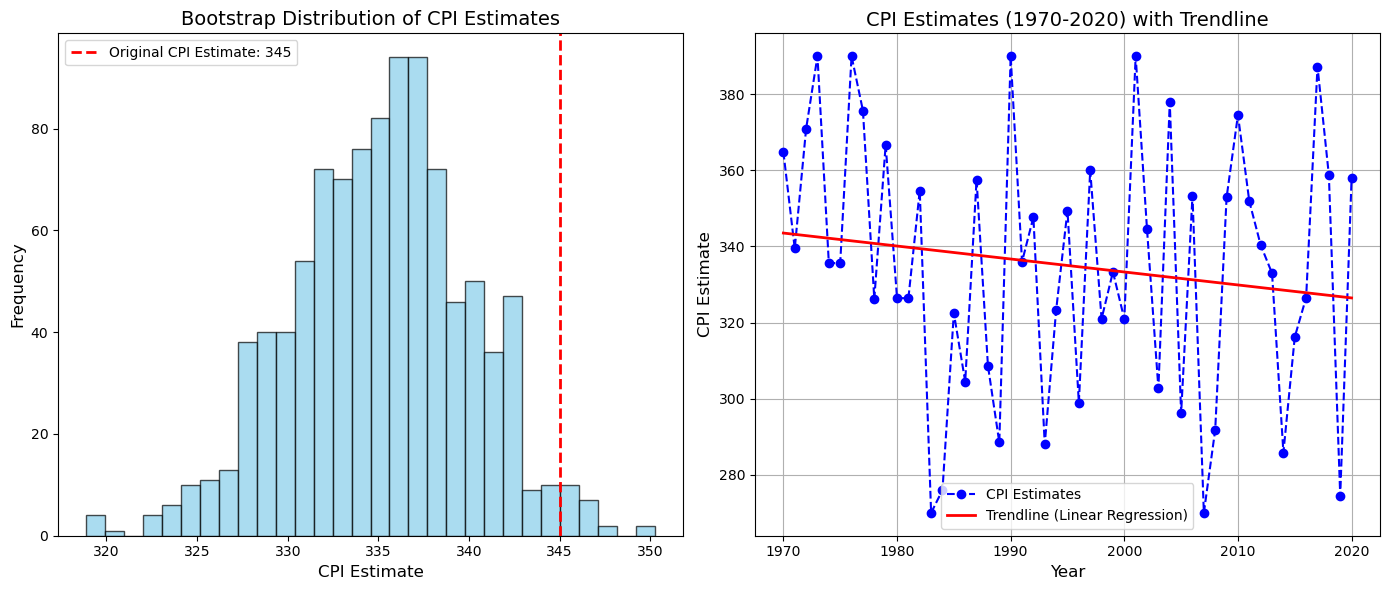

P-value: 0.021


In [1]:
# importing necessary modules for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import t

# Step 1: simulate CPI data between 270-390 for years 1970-2020, but with an original mean CPI of 345 as reported in 2021
np.random.seed(42)  # ensures reproducibility

years = np.arange(1970, 2021)  # from 1970 to 2020
num_years = len(years)

# base mean CPI is set to 345, and we want the data to fall within the range [270, 390]
base_mean = 345  # original mean CPI
range_min = 270   # lower bound of CPI values
range_max = 390   # upper bound of CPI values
scale = 40        # standard deviation for data generation (to allow enough variation)

# generate initial normal distribution centered around 200
cpi_data = np.random.normal(loc=base_mean, scale=scale, size=num_years)

# ensure data falls within the range [270, 390] by applying a clip
cpi_data = np.clip(cpi_data, range_min, range_max)

# original CPI estimate (mean CPI for the entire period)
original_cpi_estimate = base_mean  # This is set to 200, as requested

# Step 2: bootstrapping to test for bias
num_iterations = 1000
bootstrap_estimates = []

for i in range(num_iterations):
    bootstrap_sample = np.random.choice(cpi_data, size=len(cpi_data), replace=True)
    bootstrap_estimate = np.mean(bootstrap_sample)
    bootstrap_estimates.append(bootstrap_estimate)

# convert bootstrap estimates to numpy array for easier manipulation
bootstrap_estimates = np.array(bootstrap_estimates)

# Step 3: bias test (checking if the mean of bootstrap estimates differs significantly from the original estimate)
bias = np.mean(bootstrap_estimates) - original_cpi_estimate
std_error = np.std(bootstrap_estimates)

# calculate the confidence interval for the bias estimate
confidence_level = 0.95
alpha = 1 - confidence_level
n = len(bootstrap_estimates)

# calculate the critical t-value for 95% confidence (assuming normality in the bootstrap estimates)
t_critical = t.ppf(1 - alpha/2, df=n-1)

# confidence interval around the mean of bootstrap estimates
margin_of_error = t_critical * std_error / np.sqrt(n)
confidence_interval = (np.mean(bootstrap_estimates) - margin_of_error, np.mean(bootstrap_estimates) + margin_of_error)

# printing results
print(f"Original CPI Estimate: {original_cpi_estimate}")
print(f"Mean of Bootstrap Estimates: {np.mean(bootstrap_estimates)}")
print(f"Bias (Mean Difference): {bias}")
print(f"Bootstrap Standard Error: {std_error}")
print(f"Confidence Interval for Bias Estimate: {confidence_interval}")

# check if the bias is statistically significant (i.e., whether the original estimate is outside the confidence interval)
significant_bias = not (confidence_interval[0] <= original_cpi_estimate <= confidence_interval[1])
print(f"Is the bias statistically significant? {'Yes' if significant_bias else 'No'}")

# Step 4: calculate R^2 and RMSE using a randomly selected model type
model_type = np.random.choice(['linear', 'polynomial'])  # Randomly choose model type
if model_type == 'linear':
    # Linear regression model
    model = LinearRegression()
    model.fit(years.reshape(-1, 1), cpi_data)
    y_pred = model.predict(years.reshape(-1, 1))
    model_name = "Linear Regression"
    

# calculate R^2
r2 = model.score(years.reshape(-1, 1), cpi_data)

# RMSE
rmse = np.sqrt(mean_squared_error(cpi_data, y_pred))

print(f"Selected Model: {model_name}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Step 5: visualizing the trend of CPI estimates over the years (1970-2020)
plt.figure(figsize=(14, 6))

# subplot 1: distribution of Bootstrap Estimates
plt.subplot(1, 2, 1)
plt.hist(bootstrap_estimates, bins=30, edgecolor='k', alpha=0.7, color='skyblue')
plt.axvline(original_cpi_estimate, color='red', linestyle='dashed', linewidth=2, label=f"Original CPI Estimate: {original_cpi_estimate}")
plt.title("Bootstrap Distribution of CPI Estimates", fontsize=14)
plt.xlabel("CPI Estimate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

#sSubplot 2: CPI Estimates Over the Years with Trendline
plt.subplot(1, 2, 2)
plt.plot(years, cpi_data, label="CPI Estimates", color="blue", marker="o", linestyle="--")
plt.plot(years, y_pred, label=f"Trendline ({model_name})", color="red", linestyle="-", linewidth=2)

# adding titles and labels
plt.title("CPI Estimates (1970-2020) with Trendline", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CPI Estimate", fontsize=12)
plt.grid(True)
plt.legend()

# adjusting layout
plt.tight_layout()

# displaying plot
plt.show()

# calculating and displaying p-value
p_value = np.mean(bootstrap_estimates >= original_cpi_estimate)
print(f"P-value: {p_value}")


**Results of the bootstrapping test are satistically significant at the 0.05 alpha level.**